# Using Early stopping and Model checkpoint to avoid overfitting the model
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

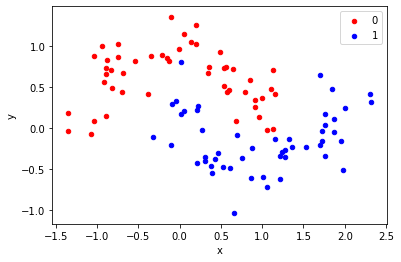

In [2]:
# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show();

Train: 1.000, Test: 0.914


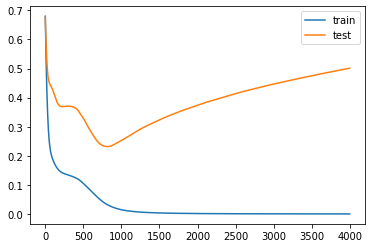

In [4]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Adding Early stopping 

Epoch 00241: early stopping
Train: 0.967, Test: 0.814


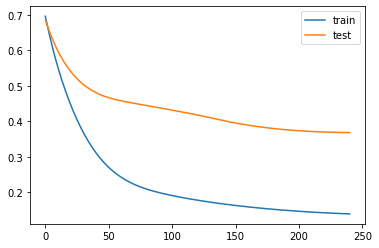

In [5]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# We can also see that the callback stopped training at epoch 200. This is too early as we would expect an early stop to be around epoch 800. This is also highlighted by the classification accuracy on both the train and test sets, which is worse than no early stopping.
# Time to add some patience

Epoch 01015: early stopping
Train: 1.000, Test: 0.943


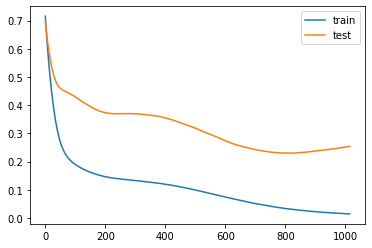

In [6]:
# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

We can also see that test loss started to increase again in the last approximately 100 epochs.

This means that although the performance of the model has improved, we may not have the best performing or most stable model at the end of training. We can address this by using a ModelChecckpoint callback.

In [11]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 00001: val_accuracy improved from -inf to 0.67143, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.67143 to 0.78571, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.78571

Epoch 00004: val_accuracy did not improve from 0.78571

Epoch 00005: val_accuracy did not improve from 0.78571

Epoch 00006: val_accuracy did not improve from 0.78571

Epoch 00007: val_accuracy did not improve from 0.78571

Epoch 00008: val_accuracy did not improve from 0.78571

Epoch 00009: val_accuracy did not improve from 0.78571

Epoch 00010: val_accuracy did not improve from 0.78571

Epoch 00011: val_accuracy did not improve from 0.78571

Epoch 00012: val_accuracy did not improve from 0.78571

Epoch 00013: val_accuracy did not improve from 0.78571

Epoch 00014: val_accuracy did not improve from 0.78571

Epoch 00015: val_accuracy did not improve from 0.78571

Epoch 00016: val_accuracy did not improve from 0.78571

Epoch 00017: val_accuracy did not im


Epoch 00161: val_accuracy did not improve from 0.82857

Epoch 00162: val_accuracy did not improve from 0.82857

Epoch 00163: val_accuracy did not improve from 0.82857

Epoch 00164: val_accuracy did not improve from 0.82857

Epoch 00165: val_accuracy did not improve from 0.82857

Epoch 00166: val_accuracy did not improve from 0.82857

Epoch 00167: val_accuracy did not improve from 0.82857

Epoch 00168: val_accuracy did not improve from 0.82857

Epoch 00169: val_accuracy did not improve from 0.82857

Epoch 00170: val_accuracy did not improve from 0.82857

Epoch 00171: val_accuracy did not improve from 0.82857

Epoch 00172: val_accuracy did not improve from 0.82857

Epoch 00173: val_accuracy did not improve from 0.82857

Epoch 00174: val_accuracy did not improve from 0.82857

Epoch 00175: val_accuracy did not improve from 0.82857

Epoch 00176: val_accuracy did not improve from 0.82857

Epoch 00177: val_accuracy did not improve from 0.82857

Epoch 00178: val_accuracy did not improve from 


Epoch 00347: val_accuracy did not improve from 0.84286

Epoch 00348: val_accuracy did not improve from 0.84286

Epoch 00349: val_accuracy did not improve from 0.84286

Epoch 00350: val_accuracy did not improve from 0.84286

Epoch 00351: val_accuracy did not improve from 0.84286

Epoch 00352: val_accuracy did not improve from 0.84286

Epoch 00353: val_accuracy did not improve from 0.84286

Epoch 00354: val_accuracy did not improve from 0.84286

Epoch 00355: val_accuracy did not improve from 0.84286

Epoch 00356: val_accuracy did not improve from 0.84286

Epoch 00357: val_accuracy did not improve from 0.84286

Epoch 00358: val_accuracy did not improve from 0.84286

Epoch 00359: val_accuracy did not improve from 0.84286

Epoch 00360: val_accuracy did not improve from 0.84286

Epoch 00361: val_accuracy did not improve from 0.84286

Epoch 00362: val_accuracy did not improve from 0.84286

Epoch 00363: val_accuracy did not improve from 0.84286

Epoch 00364: val_accuracy did not improve from 

Epoch 00538: val_accuracy did not improve from 0.84286

Epoch 00539: val_accuracy did not improve from 0.84286

Epoch 00540: val_accuracy did not improve from 0.84286

Epoch 00541: val_accuracy did not improve from 0.84286

Epoch 00542: val_accuracy did not improve from 0.84286

Epoch 00543: val_accuracy did not improve from 0.84286

Epoch 00544: val_accuracy did not improve from 0.84286

Epoch 00545: val_accuracy did not improve from 0.84286

Epoch 00546: val_accuracy did not improve from 0.84286

Epoch 00547: val_accuracy did not improve from 0.84286

Epoch 00548: val_accuracy did not improve from 0.84286

Epoch 00549: val_accuracy did not improve from 0.84286

Epoch 00550: val_accuracy did not improve from 0.84286

Epoch 00551: val_accuracy did not improve from 0.84286

Epoch 00552: val_accuracy did not improve from 0.84286

Epoch 00553: val_accuracy did not improve from 0.84286

Epoch 00554: val_accuracy did not improve from 0.84286

Epoch 00555: val_accuracy did not improve from 0


Epoch 00687: val_accuracy did not improve from 0.92857

Epoch 00688: val_accuracy did not improve from 0.92857

Epoch 00689: val_accuracy did not improve from 0.92857

Epoch 00690: val_accuracy did not improve from 0.92857

Epoch 00691: val_accuracy did not improve from 0.92857

Epoch 00692: val_accuracy did not improve from 0.92857

Epoch 00693: val_accuracy did not improve from 0.92857

Epoch 00694: val_accuracy did not improve from 0.92857

Epoch 00695: val_accuracy did not improve from 0.92857

Epoch 00696: val_accuracy did not improve from 0.92857

Epoch 00697: val_accuracy did not improve from 0.92857

Epoch 00698: val_accuracy did not improve from 0.92857

Epoch 00699: val_accuracy did not improve from 0.92857

Epoch 00700: val_accuracy did not improve from 0.92857

Epoch 00701: val_accuracy did not improve from 0.92857

Epoch 00702: val_accuracy did not improve from 0.92857

Epoch 00703: val_accuracy did not improve from 0.92857

Epoch 00704: val_accuracy did not improve from 


Epoch 00872: val_accuracy did not improve from 0.92857

Epoch 00873: val_accuracy did not improve from 0.92857

Epoch 00874: val_accuracy did not improve from 0.92857

Epoch 00875: val_accuracy did not improve from 0.92857

Epoch 00876: val_accuracy did not improve from 0.92857

Epoch 00877: val_accuracy did not improve from 0.92857

Epoch 00878: val_accuracy did not improve from 0.92857

Epoch 00879: val_accuracy did not improve from 0.92857

Epoch 00880: val_accuracy did not improve from 0.92857

Epoch 00881: val_accuracy did not improve from 0.92857

Epoch 00882: val_accuracy did not improve from 0.92857

Epoch 00883: val_accuracy did not improve from 0.92857

Epoch 00884: val_accuracy did not improve from 0.92857

Epoch 00885: val_accuracy did not improve from 0.92857

Epoch 00886: val_accuracy did not improve from 0.92857

Epoch 00887: val_accuracy did not improve from 0.92857

Epoch 00888: val_accuracy did not improve from 0.92857

Epoch 00889: val_accuracy did not improve from 

Epoch 01047: val_accuracy did not improve from 0.94286

Epoch 01048: val_accuracy did not improve from 0.94286

Epoch 01049: val_accuracy did not improve from 0.94286

Epoch 01050: val_accuracy did not improve from 0.94286

Epoch 01051: val_accuracy did not improve from 0.94286

Epoch 01052: val_accuracy did not improve from 0.94286

Epoch 01053: val_accuracy did not improve from 0.94286

Epoch 01054: val_accuracy did not improve from 0.94286

Epoch 01055: val_accuracy did not improve from 0.94286

Epoch 01056: val_accuracy did not improve from 0.94286

Epoch 01057: val_accuracy did not improve from 0.94286

Epoch 01058: val_accuracy did not improve from 0.94286

Epoch 01059: val_accuracy did not improve from 0.94286

Epoch 01060: val_accuracy did not improve from 0.94286

Epoch 01061: val_accuracy did not improve from 0.94286

Epoch 01062: val_accuracy did not improve from 0.94286

Epoch 01063: val_accuracy did not improve from 0.94286

Epoch 01064: val_accuracy did not improve from 0

Running the example, we can see the verbose output from the ModelCheckpoint callback for both when a new best model is saved and from when no improvement was observed.

We can see that the best model was observed at epoch 925 during this run. Your specific results may vary given the stochastic nature of training neural networks.

Again, we can see that early stopping continued patiently until after epoch 1,000. Note that epoch 925 + a patience of 200 is not epoch 1068. Recall that early stopping is monitoring loss on the validation dataset and that the model checkpoint is saving models based on accuracy. As such, the patience of early stopping started at an epoch other than 925.